In [1]:
# import modules and functions
import numpy as np
import pandas as pd    
import rdflib
from rdflib import Namespace
import math
import scipy
from scipy import stats
import random
import matplotlib.pyplot as plt
import multipolyfit as mpf

plt.style.use('ggplot')
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,12)
pd.set_option('display.max_colwidth', -1)

import sys
sys.path.insert(0, 'scripts/')
import astr

In [2]:
# import data
byAuthor_countWitnesses = pd.read_pickle('data/pickled/byAuthor_countWitnesses.pkl')
byAuthor_countWorks = pd.read_pickle('data/pickled/byAuthor_countWorks.pkl')
byAuthor_works = pd.read_pickle('data/pickled/byAuthor_works.pkl')
byCollection_countWitnesses = pd.read_pickle('data/pickled/byCollection_countWitnesses.pkl')
byCollection_works = pd.read_pickle('data/pickled/byCollection_works.pkl')
byPair_countImmediatelyAdjacent = pd.read_pickle('data/pickled/byPair_countImmediatelyAdjacent.pkl')
byPair_countWitnesses = pd.read_pickle('data/pickled/byPair_countWitnesses.pkl')
byPair_mss = pd.read_pickle('data/pickled/byPair_mss.pkl')
byWork_avgNeighbors = pd.read_pickle('data/pickled/byWork_avgNeighbors.pkl')
byWork_countNeighbors = pd.read_pickle('data/pickled/byWork_countNeighbors.pkl')
byWork_countOtherWorksByAuthor = pd.read_pickle('data/pickled/byWork_countOtherWorksByAuthor.pkl')
byWork_countSoloMSS = pd.read_pickle('data/pickled/byWork_countSoloMSS.pkl')
byWork_countWitnesses = pd.read_pickle('data/pickled/byWork_countWitnesses.pkl')
byWork_earliestDate = pd.read_pickle('data/pickled/byWork_earliestDate.pkl')
byWork_titles = pd.read_pickle('data/pickled/byWork_titles.pkl')

In [3]:
g = rdflib.Graph()
g.parse('data/rdf/astr.ttl', format='turtle')
g.parse('data/rdf/astr_dates.ttl', format='turtle')

<Graph identifier=Ne8d9684397fd4eb0bf9e865a80a13c3a (<class 'rdflib.graph.Graph'>)>

# Text Collections in Manuscripts

## The Problem of the Little Astronomy

_________________

### Introduction

#### Background on the Little Astronomy

There exist today eleven Greek texts which often are mentioned in scholarship to have been part of a collection named the "Little Astronomy”, a collection which supposedly gathered together works which were to be read before Ptolemy’s massive treatise on astronomy, the *Almagest*. However, the Little Astronomy’s existence in antiquity has not been definitively proven, and even the question of which works formed part of this supposed collection remains uncertain (despite the popular list of eleven).

The Little Astronomy is commonly supposed today to have comprised all or a subset of the following: Theodosius’s *Sphaerica*, *On Habitations*, and *On Nights and Days* (1st c. BCE); Autolycus’s *On the Moving Sphere* and *On Risings and Settings* (4th c. BCE); Euclid’s *Phaenomena*, *Data*, *Optics*, and *Catoptrica* (3rd c. BCE); Aristarchus’s *On the Sizes and Distances of the Sun and the Moon* (3rd c. BCE); Hypsicles’s *Anaphoricus* (2nd c. BCE); Menelaus’s *Spherics* (1st c. CE) (no longer extant); and perhaps any number of commentaries on these works. 

Various evidence has been put forward for the existence of the Little Astronomy in antiquity, one significant piece being Pappus’s *Collection* Book 6, written around the start of the fourth century CE. The book opens with the sentence “Πολλοὶ τῶν τὸν ἀστρονομούμενον τόπον διδασκόντων ἀμελέστερον τῶν προτάσεων ἀκούοντες τὰ μὲν προστιθέασιν ὡς ἀναγκαῖα, τὰ δὲ παραλείπουσιν ὡς οὐκ ἀναγκαῖα”, offering a reference to "τὸν ἀστρονομούμενον τόπον". It is in scholia to manuscripts of this text, beside this introductory section, that provide the claim that the works which Pappus will address themselves come from some grouping called “ὁ μικρος ἀστρονομουμένος”.<sup>1</sup>

Other potential evidence exists scattered through authors such as Galen, John Philoponus and Cassiodorus, but work this semester has focused on the evidence which might be found in the manuscript transmission of these eleven works. Scholars have noted that these texts tend to occur together;<sup>2</sup> it is therefore desirable to determine to what extent this fact can be used as evidence for the collection.

#### Seeking Groupings of Texts in the Manuscripts

Can we find evidence in the manuscripts for the transmission of the Little Astronomy as an ancient and intentionally arranged collection of texts? To answer this question, we first need to address another: Given a corpus of manuscripts, are there patterns in the data which allow us to identify intentionally arranged collections within those manuscripts? There are several hypotheses we can put forward while examining this question:
- The texts in such a collection are likely to co-occur frequently with each other
- If the texts in such a collection appear in manuscripts across several centuries, manuscripts containing an ancient collection are likely to be earlier rather than later (or continuous if they continue to be transmitted together)
- If we are dealing with an *ordered* collection (which the Little Astronomy may or may not have been), texts in the collection will tend to be preceded or followed by the same texts

If these hypothesized trends are valid, or other valid patterns for the transmission of a collection are found emerging from the data, the data for the Little Astronomy can then be compared to see if it fits these patterns. It must be noted, however, that works might tend to appear together for other reasons besides their shared membership in a organized collection. Shared author and shared subject matter might prove influential, and commentaries are likely to appear together with the work upon which they comment. Nor are collected works free from these influences: it is possible that they have shaped the eleven so-called Little Astronomy texts we have today. Euclid's *Catoptrics* and *Data* are especially distant from the other nine works in topic (mirrors, for example, would seem to have no relevance for the ancient study of astronomy). These two works perhaps became attached to the collection because their authorship is attributed to Euclid, who otherwise is responsible for the *Phaenomena* and *Optics* in the supposed collection.

### Organization of the Data

The dataset of work this semester centers on certain authors and works input into the workflow; information includes what manuscripts those works appear in, the dates for those manuscripts, the full contents of those manuscripts, the order of those contents, and the folio ranges for those contents.

Included in this semester's dataset are the following works and authors:

- Organized collections:
  - The aforementioned works of the Little Astronomy
  - The works of Galen (largely medical)
    - Ordered 'collections' of his corpus found in *On My Own Books*, *On the Order of My Books*, the Alexandrian Canon, and Hunayn ibn Ishaq's *Risala*
    - A main text to trace is *On the Sects*, which is typically placed first
  - The tetralogies of Plato arranged by Thrasyllus
    - E.g. the first: *Euthyphro*, *Apology*, *Crito*, and *Phaedo*
  - The Alexandrian canon of orators
    - Aeschines, Andocides, Antiphon, Demosthenes, Dinarchus, Hypereides, Isaeus, Isocrates, Lycurgus, and Lysias
  - Tragedy and trilogies
    - *Agamemnon*, *Choephoroe*, and *Eumenides*
    - *Oedipus tyrannus*, *Oedipus Coloneus*, and *Antigone*


- Authors and works of similar or related subject matter to the Little Astronomy:
  - Apollonius of Perga's works on conics
  - Archimdes's scientific and mathematical works
  - Ptolemy's scientific and mathematical works
  - Commentaries and recensions
    - Marinus's commentary on Euclid's *Data*
    - Theon of Alexandria's recension of Euclid's *Optics*


- Additionally, as a counterpoint to organized collections, several individual texts or authors have also been selected:
  - Homer, *Iliad*
  - Euripides
  - Apollonius of Rhodes, *Argonautica*
  - "Homer", *Batrachomyomachia*
  - Nicander, *Theriaca*
  - Thucydides, *Historiae*
  - Lucian
  - Dionysius Thrax, *Grammatica*
  - Aelian, *Tactica*
  - Gorgias, *Helen*

The above set of works was then widened to include all works by the 33 authors in question, so that the impact of shared authorship could be evaluated. Data on these works is drawn from several sources and brought together in an RDF graph dataset. The current sources are 1) Pinakes textes et manuscrits grecs ([pinakes.irht.cnrs.fr](pinakes.irht.cnrs.fr)), a catalogue of Greek manuscripts; 2) critical editions on the texts, which at present only cover the 11 Little Astronomy works;<sup>3</sup> and 3) visual examination of manuscripts where microfilms or digitized copies are available, which presently also extends only as far as the 11 Little Astronomy works.

In the data provided by Pinakes, the 33 authors above have written 623 works which are represented in 4115 manuscripts. This information is combined with information from the other sources in the RDF graph, which is set up to support data from multiple input sources and cite every assertion made ('This manuscript contains these texts according to Heiberg', 'This text is followed by this other text in this manuscript according to Pinakes', etc). It is also set up so that data can be added at any time from other sources, such as other manuscript catalogues.

Assertions are consistently cited because scholars often note finding errors (usually omissions) in manuscript catalogues. Pinakes, for instance, omits *On Habitations* and *On Nights and Days* from [Vat. gr. 202](http://pinakes.irht.cnrs.fr/notices/cote/66833/), which can also be seen from the SPARQL query below. But while this is a common complaint, the extent of the problem has not been measured. As this dataset expands in the future to draw from more sources, different sourced assertions can be compared and the inconsistency measured.



In [4]:
result = g.query("""
    PREFIX astr: <http://www.astronomoumenos.com/ontologies/astr.owl#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    SELECT DISTINCT ?_shelfmark ?author ?title WHERE {
        <http://www.astronomoumenos.com/id/ms6697076> rdfs:label ?_shelfmark ;
          astr:hasClaim ?claim ;
          astr:hasClaim/astr:msContains/^astr:hasClaim/astr:witnessOf ?work .
        ?work rdfs:label ?title ;
          astr:hasContributor/rdfs:label ?author .              
        ?claim astr:claimedBy <http://www.astronomoumenos.com/id/pinakes> . }""")
pd.DataFrame(result.bindings)

,_shelfmark,author,title
0,Vaticano Biblioteca Apostolica Vaticana Vat. gr. 0202,Theodosius Tripolita,Sphaerica
1,Vaticano Biblioteca Apostolica Vaticana Vat. gr. 0202,Marinus philosophus,Commentarium in Euclidis data
2,Vaticano Biblioteca Apostolica Vaticana Vat. gr. 0202,Aristarchus Samius astronomus,De magnitudinibus et distantiis solis et lunae
3,Vaticano Biblioteca Apostolica Vaticana Vat. gr. 0202,Hypsicles,Anaphoricus
4,Vaticano Biblioteca Apostolica Vaticana Vat. gr. 0202,Euclides,Phaenomena
5,Vaticano Biblioteca Apostolica Vaticana Vat. gr. 0202,Euclides,Data
6,Vaticano Biblioteca Apostolica Vaticana Vat. gr. 0202,Autolycus astronomus,De sphaera quae mouetur
7,Vaticano Biblioteca Apostolica Vaticana Vat. gr. 0202,Euclides,Optica
8,Vaticano Biblioteca Apostolica Vaticana Vat. gr. 0202,Autolycus astronomus,De ortibus et occasibus


#### Pinakes textes et manuscrits grecs

Pinakes currently provides the large bulk of the data. It is the production of the Institut de recherche et d’histoire de textes (IRHT), an independent institute within the Centre national de la recherche scientifique (CNRS). Its stated goal is a survey of all Greek manuscripts (excluding papyrus rolls) up until the sixteenth century. The project started in 1971 as the Greek Index Project under the Pontifical Institute of Mediaeval Studies before it transitioned to the IRHT in 1993. It was placed online in 2008, at which point the database comprised about 13,000 works and 40,000 manuscripts across 1,300 libraries. The bulk of the data comes from sources such as handwritten data entries and library catalogs -- manuscript descriptions from the critical editions of texts are rarely used.

While Pinakes does not claim to be complete, it is extensive enough to provide a significant subset of data for our analyses. The project therefore set up a workflow to import all of the manuscript data associated with any input authors or works into the RDF dataset. The overview page Pinakes has for the manuscript [Vat. gr. 202](http://pinakes.irht.cnrs.fr/notices/cote/66833/) offers an example of the data the website provides. Thus, from Pinakes is obtained:
- the manuscript's shelfmark and location
- the text contents of the manuscript
- the folio span for each of these texts
- the authors for each of these texts
- the order of these texts
- any identifiers (such as TLG numbers) for the texts
- notes whether these texts are particular recensions of a work
- the dates for when these texts were copied and written in the manuscript




### Exploring the Semester's Dataset

The counts above for currently input authors, works and manuscripts were given as 33, 623, and 4115 respectively. However, these 4115 manuscripts do not contain solely those 33 authors and 623 works. The full dataset for this semester, therefore, contains 4115 manuscripts whose contents include 1492 authors and 6014 works.<sup>4</sup> There are 36042 total witnesses in the dataset, a 'witness' being distinct from a 'work' in that a work is the abstract term for a particular composition (i.e. the *Sphaerica* of Theodosius) whereas a witness is the unique instance of that work in a particular manuscript (i.e. the *Sphaerica* of Theodosius which is written in Vat. gr. 202).

The base RDF graph contains 537496 triples. (This is before any inferencing has been run based on the ontology that is currently being defined in `data/rdf/astr.owl`.) One component of work this semester has been to extract and investigate various numerical data from this dataset. The queries so far have been the following:
- How many witnesses does each work have?
- What is the earliest witness date for each work?
- What is the latest witness date for each work?
- What is the range of dates for each work?
- How many works did the author of a given work write?
- How many manuscripts containing a given work contain only that work?
- Across all manuscripts containing a given work,
  - with how many other works (neighbors) does that given work appear?
  - what is the maximum number of neighbors for a given work in a single manuscript?
  - what is the minimum number of neighbors for a given work in a signle manuscript?
  - how many different works immediately precede that given work?
  - how many different works immediately follow that given work?

Since the project is focused on collections of texts, work is also ongoing to extend these questions to groups of works. So far queries have been extended to looking at pairs of works as a unit.<sup>5</sup> Thus instead of looking at manuscripts containing a witness of a given work, we look instead at manuscripts which contain both witnesses of two given works. This leads to queries such as the following:
- How many manuscripts contain the given pair of works?
- What is the sum of manuscripts containing one, the other, or both works of a given pair?
- What is the earliest manuscript date for each pair of works?
- What is the latest manuscript date for each pair of works?
- What is the range of dates for each pair of works?
- How many manuscripts containing a given pair of works contain only that pair?
- In how many manuscripts are the works of a given pair immediately adjacent?
- Across all manuscripts containing a given pair of works,
  - with how many other neighbors does that pair of works appear?
  - what is the maximum number of neighbors for a given pair of works in a single manuscript?
  - what is the minimum number of neighbors for a given pair of works in a single manuscript?

The SPARQL query language is used to ask these questions of the project's RDF graph. 







#### Tabular Data

All of the dataframes of numerical information queried using SPARQL from the RDF dataset have been saved with the `pickle` module and are located in the `data/pickled` directory of this repository. These most often take the form of two-column dataframes, linking URIs for particular works or authors to the relevant numerical data. Some dataframes link those URIs with human-readable titles or author names, and joining these dataframes allows for the human-readable tables below.

Dataframes relevant to the current narrative have been loaded above. We can therefore look quickly at some highlights of the dataset, such as which works, authors, and collections appear in the most manuscripts:

In [5]:
byWork_countWitnesses_titles_authors = pd.merge(byWork_countWitnesses, byWork_titles, on='work id', how='inner')
byWork_countWitnesses_titles_authors = pd.merge(byWork_countWitnesses_titles_authors, byAuthor_works, on='work id', how='inner')
print("Most manuscript witnesses by work")
byWork_countWitnesses_titles_authors[
     ['author', 'title', 'count of manuscript witnesses']
    ].sort_values(
     'count of manuscript witnesses', ascending=False
    ).reset_index(drop=True).head()

Most manuscript witnesses by work


,author,title,count of manuscript witnesses
0,Homerus,Ilias,403
1,Euripides,Hecuba,279
2,Euripides,Orestes,219
3,Sophocles,Aiax,216
4,Isocrates Atheniensis,Ad Demonicum,202


In [6]:
print("Most manuscript witnesses by author")
byAuthor_countWitnesses[
     ['author', 'count of manuscript witnesses']
    ].sort_values(
     'count of manuscript witnesses', ascending=False
    ).head()

Most manuscript witnesses by author


,author,count of manuscript witnesses
0,Homerus,679
1,Galenus medicus,621
2,Euripides,437
3,Lucianus,436
4,Plato philosophus,419


In [7]:
print("Most manuscript witnesses by collection")
byCollection_countWitnesses.sort_values('count of manuscript witnesses', ascending=False)

Most manuscript witnesses by collection


,collection,count of manuscript witnesses
0,Platonic Tetralogies,250
1,Little Astronomy,152
2,Oedipus Trilogy,145
3,Platonic Tetralogy I,102
4,Platonic Tetralogy VI,79
5,Platonic Tetralogy III,76
6,Platonic Tetralogy VIII,76
7,Platonic Tetralogy II,54
8,Platonic Tetralogy IV,48
9,Platonic Tetralogy IX,47


We perhaps should not be surprised that the *Iliad* is the most frequently attested text, and the sheer number of its manuscript witnesses has contributed to Homer himself topping the table of most frequently attested authors. Euripides and his works also appear high on these two tables. We can glean immediately that there must be some overlap between his *Hecuba* and *Orestes* in the manuscripts, because if we were to imagine that those two texts never appeared in the same manuscripts together, they alone would increase the manuscript witness count for Euripides to 498 rather than the actual count of 437.

Meanwhile, the table for authors with the most witnesses has Galen leaping abruptly to second place, not far behind Homer. This is easily explained by the fact that Galen has the most works in the dataset, topping the list with 166 (Lucianus follows in second place with 85).

When we group the data by collection instead of by author, the full Platonic Tetralogies, which include 36 works total, understandably top the list. The Little Astronomy follows after. It should be noted that this dataframe, with the exception of the Oedipus Trilogy, follows the same order as the number of works in each collection. This is not surprising: more works usually results in more witnesses.

The above dataframes all represent straightforward queries -- counting the number of manuscript witnesses, although viewed from a few different angles. The dataset allows us to extract more interesting information as well, although there is not the space in this present narrative to ennumerate it all. One example will suffice as being particularly relevant to the matter of ordered collections of texts:

In [8]:
byPair_countImmediatelyAdjacent_titles_authors = pd.merge(byPair_countImmediatelyAdjacent, byWork_titles, left_on='work id 1', right_on='work id', how='left').rename(columns={'title':'title 1'})
byPair_countImmediatelyAdjacent_titles_authors = pd.merge(byPair_countImmediatelyAdjacent_titles_authors, byWork_titles, left_on='work id 2', right_on='work id', how='left').rename(columns={'title':'title 2'})
byPair_countImmediatelyAdjacent_titles_authors = pd.merge(byPair_countImmediatelyAdjacent_titles_authors, byAuthor_works, left_on='work id 1', right_on='work id', how='left').rename(columns={'author':'author 1'})
byPair_countImmediatelyAdjacent_titles_authors = pd.merge(byPair_countImmediatelyAdjacent_titles_authors, byAuthor_works, left_on='work id 2', right_on='work id', how='left').rename(columns={'author':'author 2'})

byPair_countImmediatelyAdjacent_titles_authors[
     ['count of mss where works in the pair are adjacent', 'author 1', 'title 1', 'author 2', 'title 2']
    ].sort_values(
     'count of mss where works in the pair are adjacent', ascending=False
    ).reset_index(drop=True).iloc[::2].head()
# sliced to only display even index numbers because there are presently duplicates

,count of mss where works in the pair are adjacent,author 1,title 1,author 2,title 2
0,157,Euripides,Orestes,Euripides,Hecuba
2,123,Sophocles,Electra,Sophocles,Aiax
4,102,Euripides,Phoenissae,Euripides,Orestes
6,88,Aeschylus,Prometheus uinctus,Aeschylus,Septem contra Thebas
8,68,Demosthenes,Olynthiacae,Demosthenes,Philippicae


The above table takes the five pairs of works with the highest count of manuscripts in which the two works of the pair are adjacent. Tragedies top the list, followed by orations. Demosthenes is one of the canonical orators, but it is notable that none of the tragedies have a place in the two surviving dramatic trilogies (the Oresteia and the Oedipus trilogy). All five pairs are pairs of works with the same author, suggesting perhaps a tendency for the manuscripts to present at least a selection of the collected works of those authors. The above dataframe, however, ranks pairs on a straightforward count of manuscripts -- it has not yet been weighted to account for the fact that some works survive in more witnesses than others. Several of Euripides' works for instance might top the list largely because of the sheer number of manuscript witnesses these works have (Euripides, after all, does have 437 manuscript witnesses).

#### Visualizing the Data

The dataframes can present various highlights in the data, but as the number of rows increase they can lose some degree of readability. When looking at the 623 works in the dataset for instance, it is useful to turn to graph visualizations.

The project produced several functions this semester that would offer `matplotlib` graphs of information in the dataset, and these can be found in the `scripts` directory of this repository.

We turn first to a graph which provides a useful overview. It displays the relationship between the count of manuscript witnesses for a work and how many different texts appear together in the same manuscripts with the work. Each dot in the graph, displayed in red at an opacity of 20%, represents a single work. The functions are set up to allow for closer look at a subset of the graph if desirable.

[]

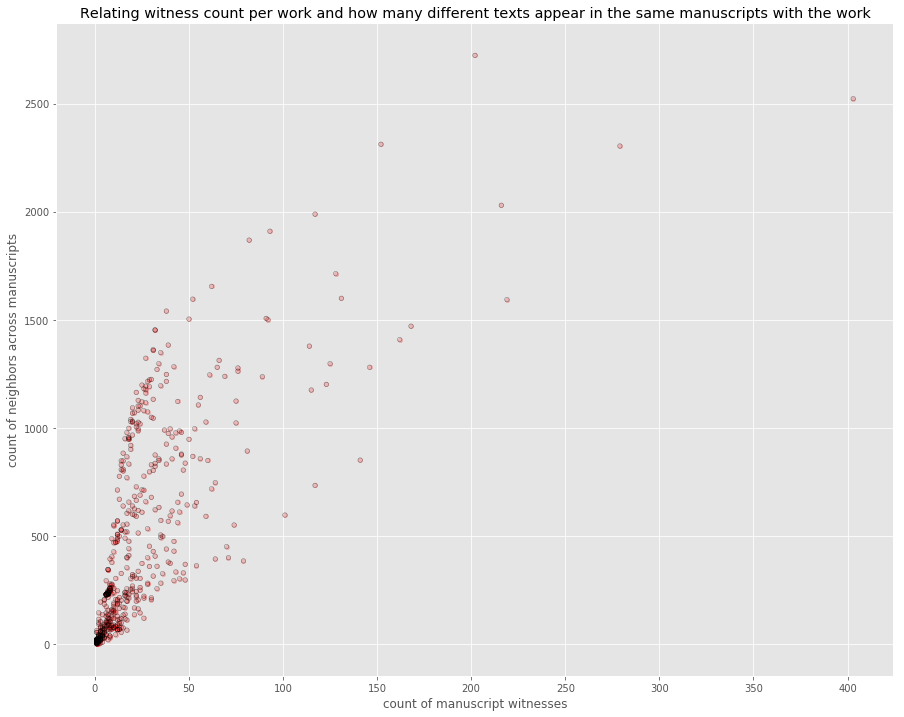

In [9]:
astr.graph_compareData(
    byWork_countWitnesses, 
    byWork_countNeighbors,
    title="Relating witness count per work and how many different texts appear in the same manuscripts with the work",
    #zoom=(100,2000)
    )

**Figure 1**
_________

Presently these functions only support best fit lines, but current work is looking into best fit curves as well, which would be welcome for this above graph. It seems to show a trend where, as the number of witnesses for a work increase, the total number of neighbors for that work increase very quickly, but only up until approximately 50 witnesses. Afterwards one does still find a greater number of neighbors, but fewer than would be the case if this were an approximately linear relationship. The initial sharp increase in neighbors with witness count is quite understandable -- these are more manuscripts which together quite likely contain more and different texts. However, it appears that at a certain point the number of neighbors 'settles' -- the additional witnesses are perhaps relatively faithful copies of other ones and contain the same works. As a result the neighbor count would not increase as rapidly.

The relationship graphed in Figure 1 and several of the figures to follow is interesting in light of the earlier hypothesis, that the texts in a collection are likely to co-occur frequently with each other. One might imagine that works located below a hypothetical best-fit curve for the graph have a relatively lower total neighbor count because they tend to appear in the same collection of works. However this is not guarenteed. It is certainly possible for a work to both often appear in a collection and to often appear elsewhere, overlapping with other works. Meanwhile, other factors might contribute to a work appearing below this hypothetical best-fit curve.

The three graphs which follow highlight certain works in the dataset by marking them with blue 'x's. They allow us to observe what influence certain factors have on the placement of works in the above graph. Below, the visualizations consider the average number of neighbors a work has in a manuscript, the number of manuscripts in which a work is the sole text, and the number of other texts written by the author of a work.

[]

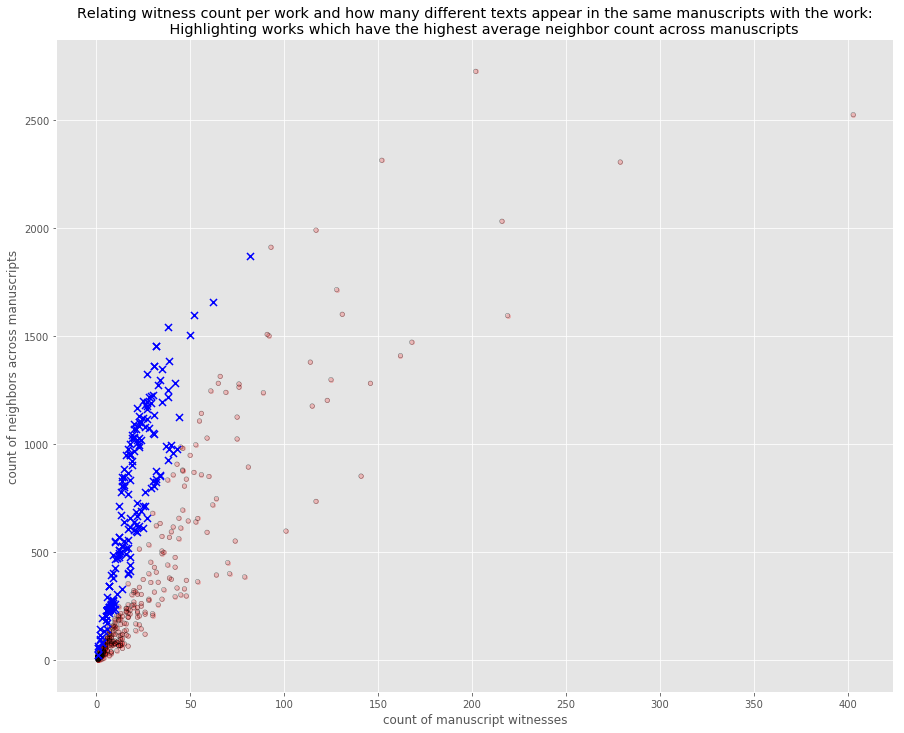

In [10]:
group_query = list(byWork_avgNeighbors[
    byWork_avgNeighbors['average number of neighbors in a manuscript'] > 
    byWork_avgNeighbors['average number of neighbors in a manuscript'].mean() 
    #+ byWork_avgNeighbors['average number of neighbors in a manuscript'].std()
    ]['work id'])
astr.graph_compareData(
    byWork_countWitnesses, 
    byWork_countNeighbors, 
    highlight=group_query,
    title="""Relating witness count per work and how many different texts appear in the same manuscripts with the work:
    Highlighting works which have the highest average neighbor count across manuscripts""",
    #zoom=(100,2000)
    )

**Figure 2**
_____________

The graph in Figure 2 above draws on information in the dataframe `byWork_avgNeighbors`, displaying those works whose calculated average neighbor count in the manuscripts is higher than average. The results here are undoubtedly to be expected -- of course a work which has a higher average neighbor count per manuscript will tend to have more neighbors overall -- but they serve as a verification that certain relationships are as expected. For this graph and the following, the selection of highlighted works can be narrowed by, for example, looking at those works one standard deviation above average.

[]

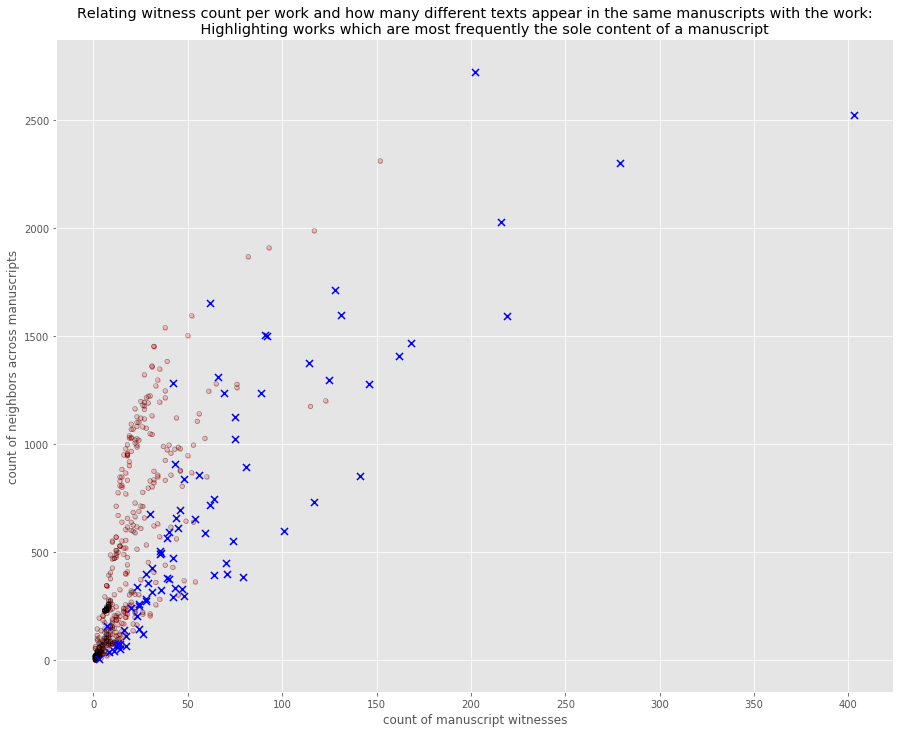

In [11]:
group_query = list(byWork_countSoloMSS[
    byWork_countSoloMSS['count of manuscripts where work is the only content'] > 
    byWork_countSoloMSS['count of manuscripts where work is the only content'].mean() 
    #+ byWork_countSoloMSS['count of manuscripts where work is the only content'].std()
    ]['work id'])
astr.graph_compareData(
    byWork_countWitnesses, 
    byWork_countNeighbors, 
    highlight=group_query,
    title="""Relating witness count per work and how many different texts appear in the same manuscripts with the work:
    Highlighting works which are most frequently the sole content of a manuscript""",
    #zoom=(100,2000)
    )

**Figure 3**
______________

Like the graph in Figure 2, that in Figure 3 also looks at the neighbors a work has within the manuscripts. Here, however, what is highlighted are those works which most frequently have zero neighbors. These are the works which have a higher than average count of solo manuscripts in the dataframe `byWork_countSoloMSS`. Again, the logic behind the results is easily grasped: works which often appear in manuscripts with no neighbors will likely have a lower overall neighbor count. While expected, however, this is not guarenteed, since there is nothing preventing a work which often appears alone from sometimes appearing alongside several or many other texts. Indeed, this must be the case for several of the highlighted works which behave as outliers above.

It is useful to keep this trend in mind when considering the hypothesis mentioned above. Perhaps membership in a collection will locate a work relatively lower on the y-axis of this graph, but it is clear that a separate factor -- how many times a work is the sole content of a manuscript -- will also contribute to this placement. This, of course, raises the question of what causes a work to appear alone in manuscripts more frequently. Length of the work is one possible factor, so as the folio ranges for works are made machine-actionable and incorporated into the RDF dataset, it will be interesting to see to what extent the physical length of a work also effects how many neighbors it has. 

[]

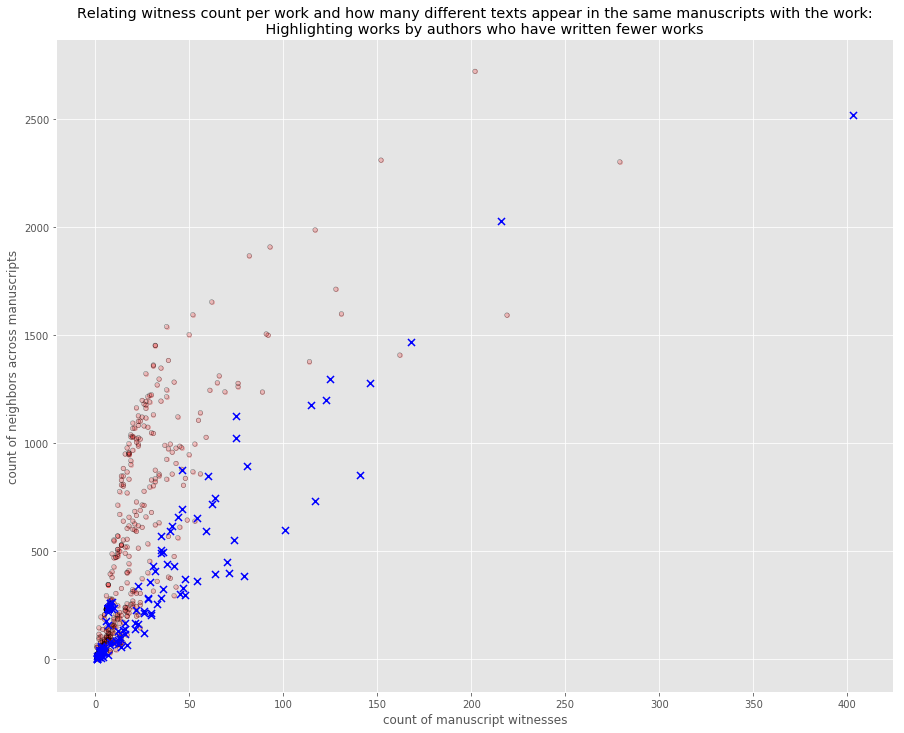

In [12]:
group_query = list(byWork_countOtherWorksByAuthor[
    byWork_countOtherWorksByAuthor['count of other works by the author'] < 
    byAuthor_countWorks['count works by author'].mean()
    ]['work id'])
astr.graph_compareData(
    byWork_countWitnesses, 
    byWork_countNeighbors, 
    highlight=group_query,
    title="""Relating witness count per work and how many different texts appear in the same manuscripts with the work:
    Highlighting works by authors who have written fewer works""",
    #zoom=(100,2000)
    )

**Figure 4**
_____________

Lastly, Figure 4 adds in information from the dataframe `byWork_countOtherWorksByAuthor`, highlighting those works whose authors wrote fewer texts than the average author's text count. Unlike Figures 2 and 3, this newly incorporated data is not a measurement on neighbor count, but it apparently correlates with a work's total neighbor count nonetheless.

There is some degree in overlap between Figures 3 and 4, and it must be acknowledged that authors who were writing fewer works may also have been writing longer ones, as for example Thucydides and Homer. It is also possible that there existed a tendency to group together works by the same author, potentially bringing the author's different works into contact with a greater number of different texts as they followed each other into various manuscripts. Nevertheless, it is useful to keep in mind this additional factor -- work count by author -- when investigating what might place a work lower on the y-axis of this graph.

With these various factors noted, we now highlight works which are members of some collection. The graph below picks out works of Plato's tetralogies, the Little Astronomy, the Oresteia, and the Oedipus trilogy:

[]

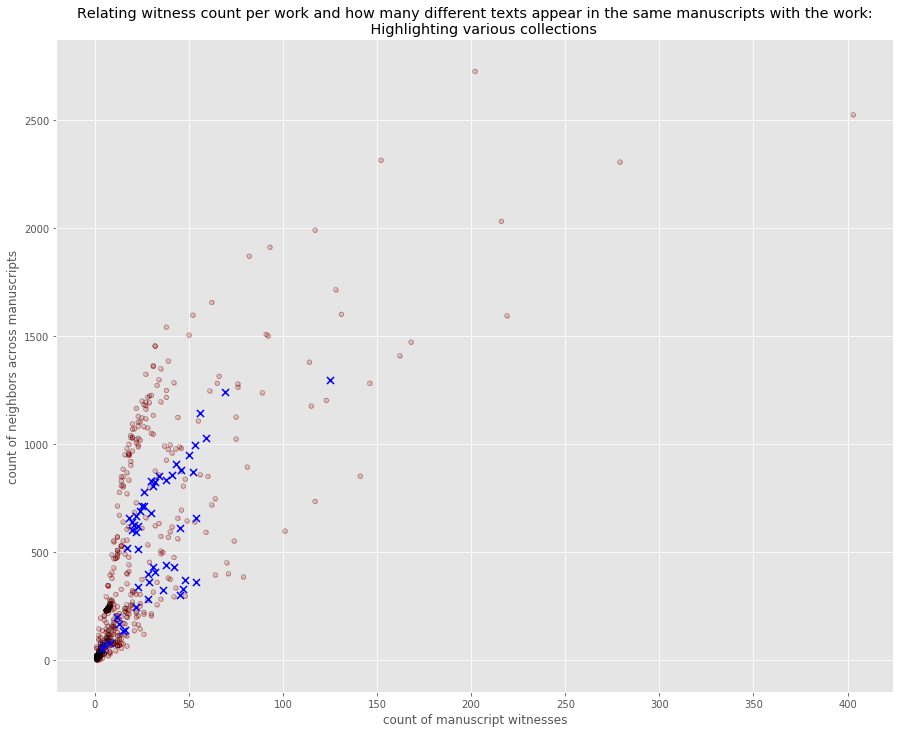

In [13]:
group_query = list(byCollection_works['work id'])
astr.graph_compareData(
    byWork_countWitnesses, 
    byWork_countNeighbors, 
    highlight=group_query,
    title="""Relating witness count per work and how many different texts appear in the same manuscripts with the work:
    Highlighting various collections""",
    #zoom=(100,2000)
    )

**Figure 5**
___________

Works highlighted in Figure 5 continue to appear somewhat lower on the y-axis, but not to the same degree as seen in Figures 3 and 4. As it turns out, the works in this selection with relatively higher neighbor counts are the tetralogical works of Plato. It is possible that this is influenced by the fact that Plato is the author with the fourth highest count of works written in the current dataset (45 works).

The graph below focuses in on the Little Astronomy:

[]

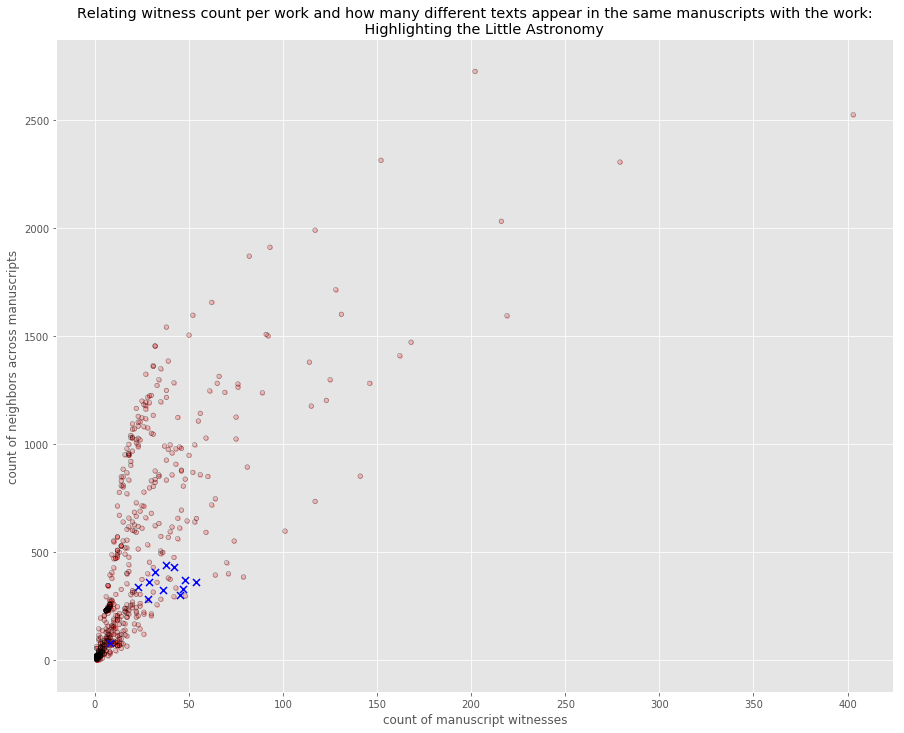

In [14]:
group_query = list(byCollection_works[byCollection_works['collection'].astype(str) == 'Little Astronomy']['work id'])
astr.graph_compareData(
    byWork_countWitnesses, 
    byWork_countNeighbors, 
    highlight=group_query,
    title="""Relating witness count per work and how many different texts appear in the same manuscripts with the work:
    Highlighting the Little Astronomy""",
    #zoom=(100,2000)
    )

**Figure 6**
____________

It is too early to come to certain conclusions from these graphs alone. If anything, the exploration through this series of figures should provide a glimpse of multiple possible and interconnected factors that result in works overlapping with more or fewer other texts. The works of the Little Astronomy do not behave contrary to expectations in Figure 6. More investigation remains to be done into to what extent this is influenced by other factors, such as the fact that Aristarchus is said to be responsible only for one text or the fact that both Theodosius's *Sphaerica* and Euclid's *Data* are works of considerable length.

These six figures all looked at the same graph; they varied only in what works were drawn out for discussion. The function used, however, allows for the easy investigation of relationships between the many numerical queries listed above as well as other numerical information. Figure 7 below provides one other example of this kind of graph. Figures 8 and 9 showcase another type of graph: representing works or pairs of works with the dates of their manuscript witnesses.

In [15]:
# some necessary setup (joins and renaming columns)
byPair_countImmediatelyAdjacent2 = byPair_countImmediatelyAdjacent
byPair_countImmediatelyAdjacent2['work id'] = byPair_countImmediatelyAdjacent['work id 1'].map(str) + " " + byPair_countImmediatelyAdjacent['work id 2'].map(str)
byPair_countImmediatelyAdjacent2 = byPair_countImmediatelyAdjacent2[['count of mss where works in the pair are adjacent', 'work id']]
byPair_sumCountWitnesses = pd.merge(byPair_countWitnesses, byWork_countWitnesses, left_on='work id 1', right_on='work id', how='inner')
byPair_sumCountWitnesses = pd.merge(byPair_sumCountWitnesses, byWork_countWitnesses, left_on='work id 2', right_on='work id', how='inner')
byPair_sumCountWitnesses.columns = ['count overlap','work id 1','work id 2','count work 1','1','count work 2','2']
byPair_sumCountWitnesses = byPair_sumCountWitnesses[['count overlap','work id 1','work id 2','count work 1','count work 2']]
byPair_sumCountWitnesses['total witness count for both works of the pair'] = byPair_sumCountWitnesses['count work 1'].map(int) + byPair_sumCountWitnesses['count work 2'].map(int) - byPair_sumCountWitnesses['count overlap'].map(int)
byPair_sumCountWitnesses['work id'] = byPair_sumCountWitnesses['work id 1'].map(str) + " " + byPair_sumCountWitnesses['work id 2'].map(str)
byPair_sumCountWitnesses = byPair_sumCountWitnesses[['total witness count for both works of the pair', 'work id']]

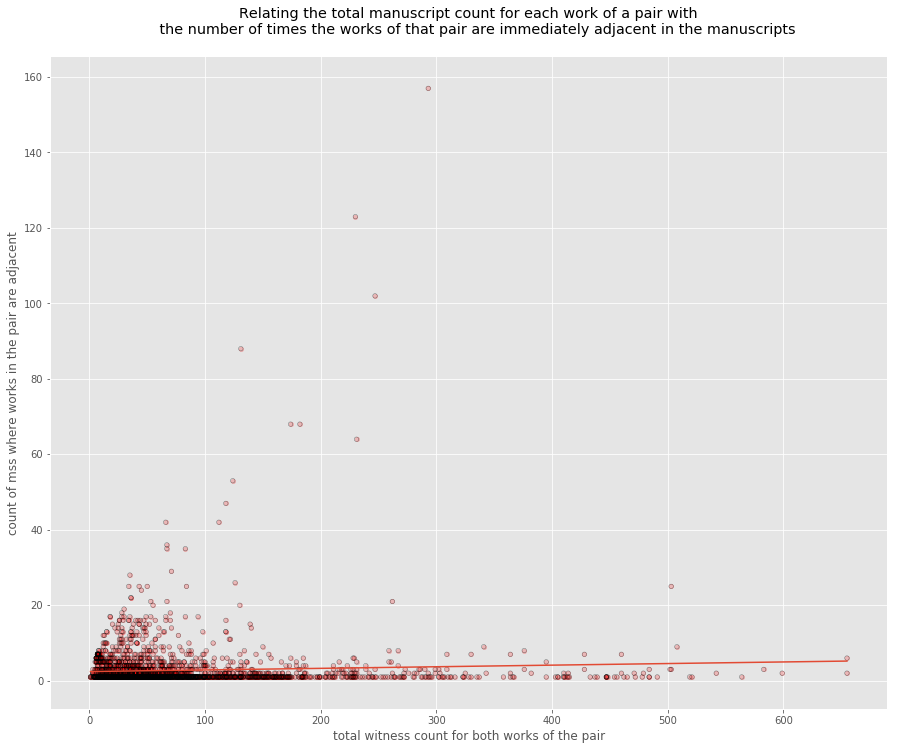

In [16]:
astr.graph_compareData(
    byPair_sumCountWitnesses, 
    byPair_countImmediatelyAdjacent2, 
    #decrease_alpha=True, 
    best_fit=True,
    title="""Relating the total manuscript count for each work of a pair with
    the number of times the works of that pair are immediately adjacent in the manuscripts
    """
    )
# note: highlighting does not currently work for graphs of pairs of works

**Figure 7**
____________

As mentioned above, analysis of co-occurring works will be key for looking into groupings of texts. This graph in Figure 7 for example will merit further examination -- we would hypothesize that pairs of works located above the best fit line tend to appear often in ordered collections.

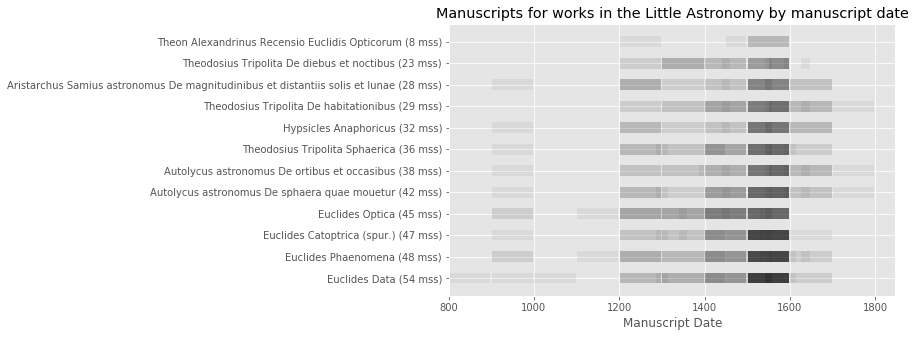

In [17]:
collectionLA = ('wo5649233','wo9903453','wo9036913','wo5476584','wo2055302','wo2911568','wo8243216','wo3990915','wo6962105','wo5748142','wo9989402','wo9833553')
astr.graph_worksByDate(astr.table_worksByDate(g,collectionLA),title="Manuscripts for works in the Little Astronomy by manuscript date")

**Figure 8**
_____________

This second kind of visualization produced this semester operates by querying the RDF graph for the manuscripts of the input works and the dates of those manuscripts, then inputting that information into a function to be graphed. Each manuscript containing a text is represented by a bar spanning the relevant range of dates (1200-1300 for a 13th century manuscript). Each of these bars is black with an opacity of 1%, so a greater number of manuscripts dated to the same time is visualized with a darker shade. From this we see that Euclid's *Data* is attested most frequently in the 16th century where the bar is darkest, as are the other works of the Little Astronomy.

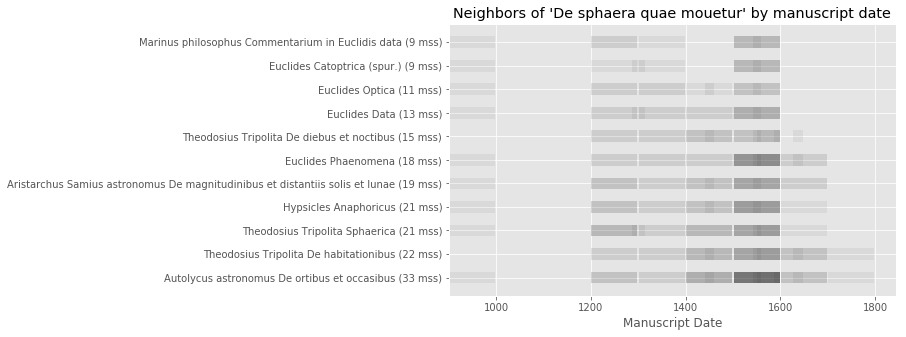

In [18]:
astr.graph_neighborsByDate(astr.table_neighborsByDate(g,'wo5748142',n=8))

**Figure 9**
_____________

The graph in Figure 9 follows the same approach as that in Figure 8, but what is graphed here are pairs of works and the manuscripts in which they appear together, whereas Figure 8 depicted individual works and their manuscripts. In Figure 9 we see an example of manuscripts containing both Autolycus's *On the Moving Sphere* and each of the works enumerated along the y-axis.

### Looking Forward

Work this semester has set up an RDF graph that models the relationships between works, authors, manuscripts, and various key metadata. While it only draws on three sources at present, the RDF database is structured to allow for the inclusion of data from any number of sources, and it does so in such a way that discrepancies between any claims of these sources can be identified and accounted for. 

The current dataset is presently based heavily on Pinakes, but looking forward there are multiple other sources which could be added. Querying the RDF graph allows us to identify which libraries contain the various manuscripts in the dataset. Thus we find possible areas for expansion:
- 605 mss in the dataset are located in the Bibliothèque nationale de France, so the BnF's digital library Gallica ([http://gallica.bnf.fr/](http://gallica.bnf.fr/)) and catalogue is an excellent resource
- 562 mss are located in the Biblioteca Apostolica Vaticana, which also has a digital library ([http://digi.vatlib.it/](http://digi.vatlib.it/)) with a selection of manuscript metadata
- 250 mss are located in the Biblioteca Medicea Laurenziana, which also has a digital library ([http://mss.bmlonline.it/](http://mss.bmlonline.it/)) and a manuscript catalogue ([http://opac.bml.firenze.sbn.it/SearchManus.htm](http://opac.bml.firenze.sbn.it/SearchManus.htm))
  - Several Italian libraries contain a significant number of manuscripts in the dataset; the MANUS online database ([http://manus.iccu.sbn.it/](http://manus.iccu.sbn.it/)) of manuscripts held by Italian libraries could also prove quite useful (and offers XML downloads)
    
Presently the dataset handles only Greek texts, but this is another area for expansion. It would be worthwhile to see what trends hold true for works and groupings in languages other than Greek. We might also ask whether works in a grouping stay together when they are translated into another language. This is particularly relevant for the Little Astronomy, whose works were translated into Arabic. Where the existence of an ancient Little Astronomy is in doubt, contemporary sources make it clear that a collection called the Middle Books (المتوسطات) existed in the Arabic tradition starting in the 9th century; these were stated to be the books a student was to read after Euclid's *Elements* but before Ptolemy's *Almagest*,<sup>6</sup> and this collection included 10 of the 11 Little Astronomy works.<sup>7</sup>

Furthermore, initial exploration into the patterns for the presently input authors and works has demonstrateed that the current dataset is weighted too heavily towards collected texts rather than individual texts. Additionally, those individual texts currently included have a significant number of manuscripts where they are the only content -- a wider selection should be made to avoid this bias. Further authors and works must be entered into the workflow and added to the RDF graph to allow us to more clearly identify what trends differ between collected and individual texts.

Expanding the dataset is one step to take, but it is clear from sample tables and graphs in this narrative that much work remains to be done in analyzing the data and disentangling what influences different factors have on the tendencies for works to be grouped together. An area which has not yet been discussed is comparison of the manuscript data in the RDF graph with the stemmata outlined for certain works by their critical editors. Do groups of texts tend to be copied into new manuscripts in their entirety and in the same order? On a related note, future work will include investigations into how to quantify and measure similarity between manuscripts. Could similar manuscripts over time allow for stemmata to be generated from the RDF graph?

To understand whether there is evidence in the manuscript transmission for the Little Astronomy as an intentional collection, we must first understand what kinds of textual groupings do exist in medieval manuscripts and what they look like in our data. Ancient collections are known: if these leave particular and distinct patterns in the dataset, the Little Astronomy can be sought according to those criteria. Much work remains to be done in expanding the sample of works in the dataset and in drawing out patterns from that data, but the backbone of this work -- the project's RDF graph with its ontology -- has shown itself to serve as a powerful and flexible tool for structuring this large and growing dataset.

### Notes

<sup>1) Mansfeld (1998) 18.</sup>

<sup>2) Neugebauer (1975) 769.</sup>

<sup>3) The editions and studies used are the following: Hultsch (1885) and Mogenet (1950) for *On the Moving Sphere* and *On Risings and Settings*, Menge (1896) for the *Data*, Heiberg (1895) for the *Optics* and *Catoptrica*, Menge (1916) for the *Phaenomena*, Heiberg (1927) and Czinczenheim (2000) for the *Sphaerica*, Hultsch (1888) and De Falco (1966) for the *Anaphoricus*, Noack (1992) for *On Sizes and Distances*, and Fecht (1927) for *On Habitations* and *On Nights and Days*.</sup>

<sup>4) We must be conscious of the fact that for these additional works and authors the dataset does not include every manuscript witness. Rather, this sample is biased -- the dataset has for them only those manuscripts where they overlap with one of the input works. No conclusions therefore should be drawn regarding the transmission of these additional works or authors.</sup>

<sup>5) Note that the number of data points will increase when doing this, from 12989 witnesses (i.e. the 12989 witnesses out of the total 36042 which are witnesses of the input 623 works, for which the dataset is less biased) to 72003 pairs of witnesses (which are pairs containing at least one of the input 623 works). In applicable cases this can be significantly cut down, however, by looking only to pairs which occur more than once -- the assumption being that a pair which occurs only once is not significant. Analyses have not yet extended to trios or quartets of texts, but these are feasible avenues for exploration.</sup>

<sup>6) Heiberg (1881) 429.</sup>

<sup>7) Pingree (1968) 16.</sup>

### Bibliography

- Archimedes. *Archimedis Opera Omnia cum Commentariis Eutocii*. Vol. II. Ed. I.L. Heiberg. Leipzig: B.G. Teubner, 1881.

- *Aristarch von Samos Untersuchungen zur Überlieferungsgeschichte der Schrift* περὶ μεγεθῶν καὶ ἀποστημάτων ἡλίου καὶ σελήνης. Ed. Beate Noack. Wiesbaden: Dr. Ludwig Reichert Verlag, 1992.

- Autolycus of Pitane. *Autolycus de Pitane, Histoire du Texte suvie de l'édition critique des traités De la Sphère en Mouvement et Des Levers et Couchers*. Ed. Joseph Mogenet. Louvain: Université de Louvain, 1950.

- Autolycus of Pitane. *Autolyci De Sphaera quae Movetur liber De Ortibus et Occasibus libri duo*. Ed. Frederick Hultsch. Leipzig: B.G. Teubner, 1885.

- Euclid. *Euclidis Data cum Commentario Marini et Scholiis Antiquis*. Ed. H. Menge. *Euclidis Opera Omnia*. Vol. VI. Ed. I.L. Heiberg and H. Menge. Leipzig: B.G. Teubner, 1896.

- Euclid. *Euclidis Optica, Opticorum Recensio Theonis, Catoptrica, cum Scholiis Antiquis*. Ed. I.L. Heiberg. *Euclidis Opera Omnia*. Vol. VII. Ed. I.L. Heiberg and H. Menge. Leipzig: B.G. Teubner, 1895.

- Euclid. *Euclidis Phaenomena et Scripta Musica*. Ed. Henry Menge. *Euclidis Opera Omnia*. Leipzig: B.G. Teubner, 1916.

- Hypsicles. *Hipsikles Die Aufgangszeiten der Gestirne*. Ed. V. De Falco, M. Krause, and O. Neugebauer. Göttingen: Vandenhoeck & Ruprecht, 1966.

- Mansfeld, Jaap. *Prolegomena Mathematica: From Apollonius of Perga to Late Neoplatonism. With an appendix on Pappus and the history of Platonism*. Leiden: Koninklijke Brill NV, 1998.

- Neugebauer, Otto. "The Almagest and its Direct Predecessors". *A History of Ancient Mathematical Astronomy*. Berlin: Springer-Verlag, 1975.

- Pingree, David. "Review: Hypsikles: Die Aufgangszeiten der Gestirne by V. De Falco, M. Krause and O. Neugebauer". *Gnomon* 40.1 (1968): 13-17.

- Theodosius. *Edition, traduction, et commentaire des Sphériques de Theodosé*. Ed: Claire Czinczenheim. Dissertation, l'Université Paris, 2000.

- Theodosius. *Theodosii De Habitationibus liber De Diebus et Noctibus libri duo*. Ed. Rudolf Fecht. Berlin: Wiedmannsche Buchhandlung, 1927.

- Theodosius. *Theodosius Tripolites Sphaerica*. Ed. J.L. Heiberg. Berlin: Weidmannsche Buchhandlung, 1927.

